## Spending and Income Recap

### Make a daily spending and income data

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from calendar import monthrange

# Load the dataset
data = pd.read_excel("student_spending.xlsx")

# Define spending categories
spending = ['tuition', 'housing', 'food', 'transportation', 'books_supplies',
            'entertainment', 'personal_care', 'technology', 'health_wellness', 'miscellaneous']

# Define income and specific categories to be applied on the 1st day
income = ['monthly_income', 'financial_aid']

# Features to retain in the final daily DataFrame
static_features = ['index', 'age', 'gender', 'year_in_school', 'major', 'preferred_payment_method']
'''
# Select the first 100 rows
selected_data = data.iloc[:100]

# Function to calculate the number of days in a given month
def get_days_in_month(date):
    year, month = date.year, date.month
    return monthrange(year, month)[1]

# Function to generate daily spending for a given user and month
def generate_daily_spending(user, start_date, days_in_month):
    daily_spending = []

    # Generate random proportions for all spending categories
    proportions = {category: np.random.random(days_in_month) for category in spending}
    for category in proportions:
        proportions[category] /= proportions[category].sum()  # Normalize to sum up to 1

    for day in range(days_in_month):
        daily_row = {
            'index': user['index'],  # Use the user's ID
            'date': start_date + timedelta(days=day),  # Calculate the date
        }

        # Add static features
        for feature in static_features:
            daily_row[feature] = user[feature]

        # Add income and fixed expenses on the first day only
        if day == 0:
            for category in income:
                daily_row[category] = user[category]
        else:
            for category in income:
                daily_row[category] = 0  # No income or fixed expenses after the first day

        # Distribute spending for the current day based on proportions
        for category in spending:
            daily_row[category] = np.round(proportions[category][day] * user[category], 2)

        daily_spending.append(daily_row)

    # Ensure monthly totals are exact by adjusting the last day's value
    for category in spending:
        daily_total = sum(row[category] for row in daily_spending)
        adjustment = np.round(user[category] - daily_total, 2)
        daily_spending[-1][category] += adjustment  # Adjust the last day's value

    return pd.DataFrame(daily_spending)

# Prepare to generate daily spending data
daily_spending_list = []
current_date = datetime(2016, 9, 1)  # Start from September 2016

# Generate daily data for each user
for i, user in selected_data.iterrows():
    days_in_month = get_days_in_month(current_date)  # Get the number of days in the current month
    daily_spending_list.append(generate_daily_spending(user, current_date, days_in_month))
    # Move to the next month
    if current_date.month == 12:  # If December, wrap around to January of the next year
        current_date = current_date.replace(year=current_date.year + 1, month=1)
    else:  # Otherwise, just increment the month
        current_date = current_date.replace(month=current_date.month + 1)

# Combine all daily spending data into a single DataFrame
combined_spending = pd.concat(daily_spending_list, ignore_index=True)

# Save the result to an Excel file
combined_spending.to_excel("daily_spending_income.xlsx", index=False)

'''


'\n# Select the first 100 rows\nselected_data = data.iloc[:100]\n\n# Function to calculate the number of days in a given month\ndef get_days_in_month(date):\n    year, month = date.year, date.month\n    return monthrange(year, month)[1]\n\n# Function to generate daily spending for a given user and month\ndef generate_daily_spending(user, start_date, days_in_month):\n    daily_spending = []\n\n    # Generate random proportions for all spending categories\n    proportions = {category: np.random.random(days_in_month) for category in spending}\n    for category in proportions:\n        proportions[category] /= proportions[category].sum()  # Normalize to sum up to 1\n\n    for day in range(days_in_month):\n        daily_row = {\n            \'index\': user[\'index\'],  # Use the user\'s ID\n            \'date\': start_date + timedelta(days=day),  # Calculate the date\n        }\n\n        # Add static features\n        for feature in static_features:\n            daily_row[feature] = user[f

### Monthly spending and income recap

In [ ]:
import pandas as pd
from datetime import datetime

# Load the daily spending dataset
daily_data = pd.read_excel("daily_spending_income.xlsx")

# Ensure the date column is in datetime format
daily_data['date'] = pd.to_datetime(daily_data['date'])

# Initialize a dictionary to store end-of-month recaps
end_of_month_recaps = {}

# Get today's date
today = datetime.now()
current_month_key = f"{today.year}-{today.month:02d}"

# Filter data for the current month up to today
current_month_data = daily_data[
    (daily_data['date'].dt.month == today.month) &
    (daily_data['date'].dt.year == today.year) &
    (daily_data['date'] <= today)
]

# Calculate total spending and income for the current month up to today
current_spending = current_month_data[spending].sum()
current_income = current_month_data[income].sum()

# Calculate overall totals
current_total_spending = current_spending.sum()
current_total_income = current_income.sum()

# Calculate percentages for each spending category
current_spending_percentages = (
    (current_spending / current_total_spending * 100).round(2) if current_total_spending > 0 else None
)

# Store the recap in the dictionary
end_of_month_recaps[current_month_key] = {
    "spending_recap": current_spending.to_dict(),
    "spending_percentages": current_spending_percentages.to_dict() if current_spending_percentages is not None else None,
    "income_recap": current_income.to_dict(),
    "overall_total_spending": current_total_spending,
    "overall_total_income": current_total_income,
}

# Check if today is the end of the month
if today.day == daily_data[daily_data['date'].dt.month == today.month]['date'].dt.day.max():
    # Initialize a list to store end-of-month data
    end_of_month_summary = []

    # Append spending, income, and feature details
    end_of_month_summary.append({
        "date": today.strftime('%Y-%m-%d'),
        "spending": current_spending.to_dict(),
        "income": current_income.to_dict(),
        "total_spending": current_total_spending,
        "total_income": current_total_income,
    })

    print("End of Month Summary:", end_of_month_summary)

# Display the current month's recap
print(f"\nRecap for {current_month_key}: (From Start of Month to Today)")
print(f"Spending Recap: {end_of_month_recaps[current_month_key]['spending_recap']}")
print(f"Spending Percentages: {end_of_month_recaps[current_month_key]['spending_percentages']}")
print(f"Income Recap: {end_of_month_recaps[current_month_key]['income_recap']}")
print(f"Overall Total Spending: {end_of_month_recaps[current_month_key]['overall_total_spending']}")
print(f"Overall Total Income: {end_of_month_recaps[current_month_key]['overall_total_income']}")



Recap for 2024-12: (From Start of Month to Today)
Spending Recap: {'tuition': 1288.0100000000002, 'housing': 270.57, 'food': 137.86, 'transportation': 22.16, 'books_supplies': 72.54999999999998, 'entertainment': 47.57000000000001, 'personal_care': 28.03, 'technology': 34.02, 'health_wellness': 37.29999999999999, 'miscellaneous': 19.529999999999998}
Spending Percentages: {'tuition': 65.8, 'housing': 13.82, 'food': 7.04, 'transportation': 1.13, 'books_supplies': 3.71, 'entertainment': 2.43, 'personal_care': 1.43, 'technology': 1.74, 'health_wellness': 1.91, 'miscellaneous': 1.0}
Income Recap: {'monthly_income': 803, 'financial_aid': 796}
Overall Total Spending: 1957.6000000000001
Overall Total Income: 1599


### Finding out trend in spending and income this month compare to last month

In [ ]:
# Ensure the 'date' column is in datetime format
daily_data['date'] = pd.to_datetime(daily_data['date'])

# Group data by month and sum up the spending and income
# Exclude the 'date' column and non-numeric columns from the sum operation
numerical_cols = [
    'age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
    'transportation', 'books_supplies', 'entertainment', 'personal_care',
    'technology', 'health_wellness', 'miscellaneous'
]
monthly_summary = daily_data.groupby(daily_data['date'].dt.to_period('M'))[numerical_cols].sum()

# Get the percentage change from the previous month
monthly_percentage_change = monthly_summary.pct_change().round(4) * 100  # Convert to percentage


# Generate insights for trends
trend_insights = []
current_month = today.strftime('%Y-%m')  # Get the current month in 'YYYY-MM' format
previous_month = (today.replace(day=1) - timedelta(days=1)).strftime('%Y-%m')  # Get the previous month in 'YYYY-MM'

# Check if both current and previous months exist in the data
if current_month in monthly_summary.index.astype(str) and previous_month in monthly_summary.index.astype(str):
    # Add insights for total spending and total income
    total_spending_change = monthly_percentage_change[spending].sum(axis=1).iloc[-1]
    total_income_change = monthly_percentage_change[income].sum(axis=1).iloc[-1]

    if not pd.isna(total_spending_change):  # Ensure the change is valid
        if total_spending_change > 0:
            trend_insights.append(f"Your total spending increased by {total_spending_change:.2f}% compared to last month.")
        elif total_spending_change < 0:
            trend_insights.append(f"Your total spending decreased by {abs(total_spending_change):.2f}% compared to last month.")

    if not pd.isna(total_income_change):  # Ensure the change is valid
        if total_income_change > 0:
            trend_insights.append(f"Your total income increased by {total_income_change:.2f}% compared to last month.")
        elif total_income_change < 0:
            trend_insights.append(f"Your total income decreased by {abs(total_income_change):.2f}% compared to last month.")

    # Add insights for individual spending categories
    for category in spending:
        if not monthly_percentage_change[category].isna().iloc[-1]:  # Check if percentage change is not NaN
            change = abs(monthly_percentage_change[category].iloc[-1])  # Get absolute percentage change
            if monthly_percentage_change[category].iloc[-1] > 0:
                trend_insights.append(f"Your spending on {category} increased by {change:.2f}% compared to last month.")
            elif monthly_percentage_change[category].iloc[-1] < 0:
                trend_insights.append(f"Your spending on {category} decreased by {change:.2f}% compared to last month.")

    # Add insights for individual income categories
    for category in income:
        if not monthly_percentage_change[category].isna().iloc[-1]:  # Check if percentage change is not NaN
            change = abs(monthly_percentage_change[category].iloc[-1])  # Get absolute percentage change
            if monthly_percentage_change[category].iloc[-1] > 0:
                trend_insights.append(f"Your income from {category} increased by {change:.2f}% compared to last month.")
            elif monthly_percentage_change[category].iloc[-1] < 0:
                trend_insights.append(f"Your income from {category} decreased by {change:.2f}% compared to last month.")

# Display the insights
if trend_insights:
    print("\n**Trend Insights Compared to Last Month:**")
    for insight in trend_insights:
        print(insight)
else:
    print("\nNo trend insights available. Ensure there is data for both the current and previous months.")



**Trend Insights Compared to Last Month:**
Your total spending increased by 58.29% compared to last month.
Your total income increased by 62.18% compared to last month.
Your spending on tuition decreased by 26.24% compared to last month.
Your spending on housing increased by 18.30% compared to last month.
Your spending on food increased by 76.51% compared to last month.
Your spending on transportation decreased by 60.29% compared to last month.
Your spending on books_supplies increased by 37.74% compared to last month.
Your spending on entertainment increased by 26.79% compared to last month.
Your spending on personal_care decreased by 7.94% compared to last month.
Your spending on technology decreased by 68.89% compared to last month.
Your spending on health_wellness increased by 20.93% compared to last month.
Your spending on miscellaneous increased by 41.38% compared to last month.
Your income from monthly_income decreased by 13.93% compared to last month.
Your income from financia

In [ ]:
'''import h5py
import numpy as np

# Create a file to store the data
h5_filename = "financial_model_data.h5"

# Assuming `end_of_month_recaps` and `trend_insights` are the data structures you want to save
with h5py.File(h5_filename, 'w') as h5_file:
    # Save the end-of-month recaps
    for month_key, recap_data in end_of_month_recaps.items():
        group = h5_file.create_group(month_key)
        for key, value in recap_data.items():
            if isinstance(value, dict):
                subgroup = group.create_group(key)
                for subkey, subvalue in value.items():
                    subgroup.create_dataset(subkey, data=subvalue if isinstance(subvalue, (list, np.ndarray)) else [subvalue])
            elif isinstance(value, (list, np.ndarray)):
                group.create_dataset(key, data=value)
            else:
                group.create_dataset(key, data=[value])

    # Save trend insights as a dataset
    trend_insights_encoded = [insight.encode('utf-8') for insight in trend_insights]
    h5_file.create_dataset("trend_insights", data=trend_insights_encoded)

print(f"Model data saved to {h5_filename}")'''


'import h5py\nimport numpy as np\n\n# Create a file to store the data\nh5_filename = "financial_model_data.h5"\n\n# Assuming `end_of_month_recaps` and `trend_insights` are the data structures you want to save\nwith h5py.File(h5_filename, \'w\') as h5_file:\n    # Save the end-of-month recaps\n    for month_key, recap_data in end_of_month_recaps.items():\n        group = h5_file.create_group(month_key)\n        for key, value in recap_data.items():\n            if isinstance(value, dict):\n                subgroup = group.create_group(key)\n                for subkey, subvalue in value.items():\n                    subgroup.create_dataset(subkey, data=subvalue if isinstance(subvalue, (list, np.ndarray)) else [subvalue])\n            elif isinstance(value, (list, np.ndarray)):\n                group.create_dataset(key, data=value)\n            else:\n                group.create_dataset(key, data=[value])\n\n    # Save trend insights as a dataset\n    trend_insights_encoded = [insight.en

In [ ]:
import h5py
import numpy as np

# Create a file to store the data
h5_filename = "monthly_recap.h5"

# Assuming `end_of_month_recaps` and `trend_insights` are the data structures you want to save
with h5py.File(h5_filename, 'w') as h5_file:
    # Save the end-of-month recaps
    for month_key, recap_data in end_of_month_recaps.items():
        group = h5_file.create_group(month_key)
        for key, value in recap_data.items():
            if isinstance(value, dict):
                subgroup = group.create_group(key)
                for subkey, subvalue in value.items():
                    subgroup.create_dataset(subkey, data=subvalue if isinstance(subvalue, (list, np.ndarray)) else [subvalue])
            elif isinstance(value, (list, np.ndarray)):
                group.create_dataset(key, data=value)
            else:
                group.create_dataset(key, data=[value])

    # Save trend insights as a dataset
    trend_insights_encoded = [insight.encode('utf-8') for insight in trend_insights]
    h5_file.create_dataset("trend_insights", data=trend_insights_encoded)

print(f"Model data saved to {h5_filename}")


Model data saved to monthly_recap.h5


In [ ]:
import json

# Simulated results for demonstration purposes
recap = {
    "spending_recap": current_spending.to_dict(),
    "spending_percentages": current_spending_percentages.to_dict() if current_spending_percentages is not None else None,
    "income_recap": current_income.to_dict(),
    "overall_total_spending": current_total_spending,
    "overall_total_income": current_total_income,
}

trend_insights_json = {
    "trend_insights": trend_insights
}

output_json = {
    "current_month_recap": recap,
    "trend_insights": trend_insights_json
}

# Save to JSON file
with open('monthly_summary.json', 'w') as json_file:
    json.dump(output_json, json_file, indent=4, default=lambda o: int(o) if isinstance(o, np.int64) else o) # Added a custom default function to convert int64
                                                                                                                      # type to a standard Python int

print("Results saved to monthly_summary.json")


Results saved to monthly_summary.json


## Saving Goal Optimization

In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['gender', 'year_in_school', 'major', 'preferred_payment_method']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Scale numeric features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Step 3: Clustering Users
# Extract spending-related columns for clustering

X_spending = data[spending]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['spending_cluster'] = kmeans.fit_predict(X_spending)

# Regression Model for Savings Prediction
# Add a 'savings' column as target (assumed formula for demo purposes)
data['savings'] = data['monthly_income'] - data[spending].sum(axis=1)

# Define features and target
X = data.drop(columns=['savings'])
y = data['savings']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Regression Model using TensorFlow
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 5: Generate Recommendations
def recommend_savings(user_data):
    # Predict savings for a new user
    user_cluster = kmeans.predict(user_data[spending].to_frame().T)[0]
    cluster_data = data[data['spending_cluster'] == user_cluster]
    avg_savings = cluster_data['savings'].mean()
    return f"Based on your spending, you can save approximately ${avg_savings:.2f} per month."

# Test recommendation
sample_user = data.iloc[0]  # Replace with new user data
print(recommend_savings(sample_user))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 324.2126 - mae: 12.8960 - val_loss: 16.3975 - val_mae: 3.2220
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7157 - mae: 2.7729 - val_loss: 9.7851 - val_mae: 2.4517
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.5445 - mae: 2.2232 - val_loss: 9.0094 - val_mae: 2.3517
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9318 - mae: 1.9949 - val_loss: 6.1439 - val_mae: 1.8860
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8031 - mae: 1.7897 - val_loss: 4.0754 - val_mae: 1.5010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4088 - mae: 1.3170 - val_loss: 3.7990 - val_mae: 1.4465
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4992 - mae: 1.0724 - val_loss: 1.7647 - val_mae: 0.8613
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9947 - mae: 0.9044 - val_loss: 1.8677 - val_mae: 0.9022
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3181 -

In [ ]:
# Save the model in HDF5 format
model.save('savings_model.h5')

In [ ]:
model_json = model.to_json()
with open("saving_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import tensorflow as tf
# Define the name for the TFLite file
tflite_filename = "saving_model.tflite"

# Convert model to TensorFlow Lite format and save with custom name
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to the specified file
with open(tflite_filename, "wb") as tflite_file:
    tflite_file.write(tflite_model)

print(f"TensorFlow Lite model saved as {tflite_filename}")


Saved artifact at '/tmp/tmpqdk7t561'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 19), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132605994471792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605988429264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605988432784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605988432608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605988433840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605988433136: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model saved as saving_model.tflite


## Anomaly Detection

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

# Load the dataset from Excel
daily_data = pd.read_excel('daily_spending_income.xlsx')

# Define numerical columns (remove categorical_cols as they are no longer needed)
numerical_cols = [
    'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
    'transportation', 'books_supplies', 'entertainment', 'personal_care',
    'technology', 'health_wellness', 'miscellaneous'
]

# Preprocessing: Scaling
numerical_transformer = StandardScaler()

# Apply preprocessing: Only scaling for numerical columns
X = daily_data[numerical_cols]
X_processed = numerical_transformer.fit_transform(X)

# Convert processed data to a DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=numerical_cols)

# Placeholder labels (for anomaly detection, we use unsupervised learning)
y = np.ones(X_processed_df.shape[0])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

### Tensorflow Model

In [ ]:
# Menghitung class weights secara otomatis berdasarkan distribusi kelas dalam y_train
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print(f"Class Weights: {class_weight_dict}")

# Definisikan model dengan regularisasi, dropout dan learning rate yang lebih rendah
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],),
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization
    tf.keras.layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    tf.keras.layers.Dense(16, activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization
    tf.keras.layers.Dropout(0.5),  # Dropout untuk mengurangi overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # Klasifikasi biner
])

# Kompilasi model dengan learning rate yang lebih kecil
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Learning rate lebih kecil
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Gunakan EarlyStopping untuk menghentikan pelatihan jika model overfit
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Latih model dengan batch size yang lebih besar dan class weights
history = model1.fit(
    X_train,
    y_train,
    epochs=20,  # Mengurangi epoch untuk melihat lebih cepat hasilnya
    batch_size=64,  # Batch size lebih besar untuk stabilitas
    validation_data=(X_test, y_test),
    class_weight=class_weight_dict,  # Memperhatikan ketidakseimbangan kelas
    callbacks=[early_stopping]  # Early stopping untuk mencegah overfitting
)

Class Weights: {0: 1.0}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3124 - loss: 1.4420 - val_accuracy: 0.3021 - val_loss: 1.1596
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3736 - loss: 1.3341 - val_accuracy: 0.4089 - val_loss: 1.1057
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3830 - loss: 1.3215 - val_accuracy: 0.5238 - val_loss: 1.0567
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4328 - loss: 1.2354 - val_accuracy: 0.6535 - val_loss: 1.0124
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4891 - loss: 1.1595 - val_accuracy: 0.7553 - val_loss: 0.9718
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5214 - loss: 1.1304 - val_accuracy: 0.8473 - val_loss: 0.9349
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5628 - loss: 1.1029 - val_accuracy: 0.9015 - val_loss: 0.9012
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6140 - loss: 1.0363 - val_accuracy: 0.9507 - val_loss: 0.8705
Ep

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.6106 
Test Loss: 0.6073592901229858
Test Accuracy: 1.0


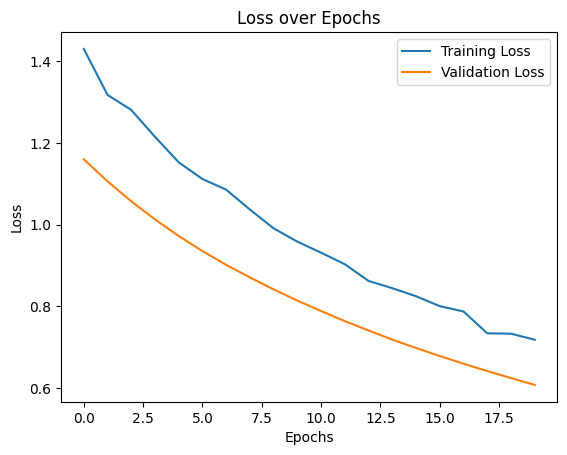

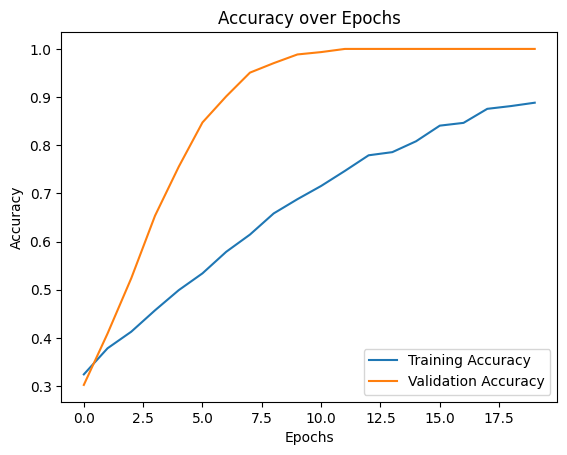

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       609

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609



In [ ]:
# Evaluasi model setelah pelatihan
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Visualisasikan grafik Loss dan Accuracy selama pelatihan
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Menampilkan Classification Report untuk lebih memahami hasil prediksi
y_pred = (model1.predict(X_test) > 0.5).astype('int32')  # Ubah probabilitas menjadi 0 atau 1
print(classification_report(y_test, y_pred))

In [ ]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6106 
Test Loss: 0.6073592901229858
Test Accuracy: 1.0


In [ ]:
y_pred = (model1.predict(X_test) > 0.5).astype('int32')
print(classification_report(y_test, y_pred))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       609

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609



20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Dynamic threshold for anomalies: 0.9375


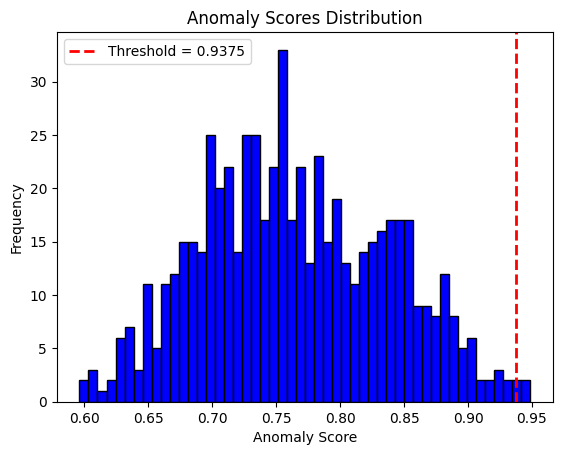

In [ ]:
# Predict anomalies
predictions = model1.predict(X_test)

# Use dynamic threshold for detecting anomalies
threshold = np.percentile(predictions, 99.5)  # Calculate threshold dynamically
print(f"Dynamic threshold for anomalies: {threshold:.4f}")

# Detect anomalies based on the threshold
predicted_anomalies = (predictions < threshold).astype(int)  # 1 for anomaly, 0 for normal

# Visualize anomaly scores
plt.hist(predictions, bins=50, color='blue', edgecolor='k')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold = {threshold:.4f}')
plt.title('Anomaly Scores Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [ ]:
# Save model in H5 format
model1.save('anomaly_model.h5')

In [ ]:
model_json = model1.to_json()
with open("anomaly_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Define the name for the TFLite file
tflite_filename = "anomaly_model.tflite"

# Convert model to TensorFlow Lite format and save with custom name
converter = tf.lite.TFLiteConverter.from_keras_model(model1)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to the specified file
with open(tflite_filename, "wb") as tflite_file:
    tflite_file.write(tflite_model)

print(f"TensorFlow Lite model saved as {tflite_filename}")


Saved artifact at '/tmp/tmpdk48rzcd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132605878561152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605876739888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605877289904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605876733728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605876739008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132605876743056: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model saved as anomaly_model.tflite


In [ ]:
import h5py

# Open the three existing files in read mode ('r')
with h5py.File('monthly_recap.h5', 'r') as file1, \
     h5py.File('savings_model.h5', 'r') as file2, \
     h5py.File('anomaly_model.h5', 'r') as file3:

    # Create a new H5 file in write mode ('w')
    with h5py.File('combined_data.h5', 'w') as combined_file:

        # Copy data from file1 (monthly_recap.h5)
        for key in file1.keys():
            file1.copy(key, combined_file, name=f'monthly_recap/{key}')

        # Copy data from file2 (savings_model.h5)
        for key in file2.keys():
            file2.copy(key, combined_file, name=f'savings_model/{key}')

        # Copy data from file3 (anomaly_model.h5)
        for key in file3.keys():
            file3.copy(key, combined_file, name=f'anomaly_detection/{key}')

print("All files have been combined into 'combined_data.h5'")